In [1]:
#Importing Some important Libraries
import numpy as np
import pandas as pd

# **Data Collecting and Preprocessing**

In [2]:
df = pd.read_csv('/content/heart.csv')

In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df = df.rename(columns={'sex': 'gender'})

In [5]:
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df.shape

(303, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isnull().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# statistical measures 
df.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Checking if there is an effictive outliers

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

<Axes: xlabel='trestbps'>

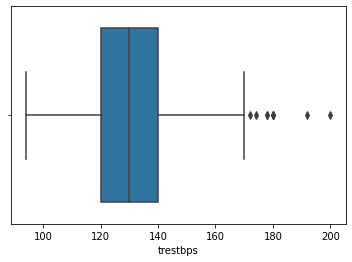

In [12]:
sns.boxplot(x=df['trestbps'])

<Axes: xlabel='chol'>

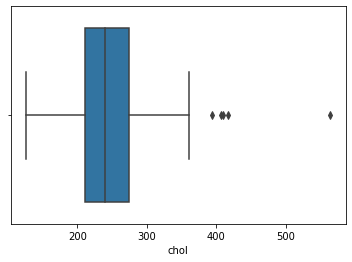

In [13]:
sns.boxplot(x=df['chol'])

In [14]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

**I found some outliers here, and I will deal with them**

In [15]:
df['trestbps'] = df['trestbps'].replace(200, df['trestbps'].median())
df['chol'] = df['chol'].replace(564.000000, df['chol'].median())
df=df.drop(labels='fbs', axis=1)  #I droped the whole fbs column because it has so many outliers so it will affect the model very negativly

<Axes: xlabel='chol'>

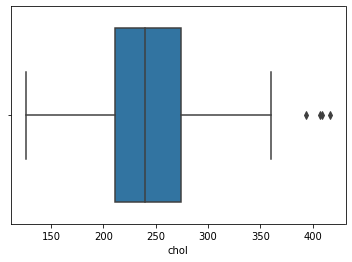

In [16]:
sns.boxplot(x=df['chol'])

<Axes: xlabel='trestbps'>

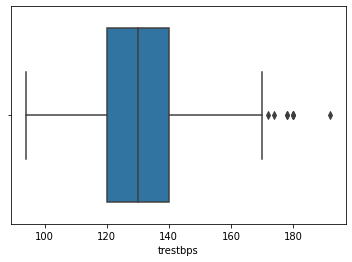

In [17]:
sns.boxplot(x=df['trestbps'])

I reduced the outliers as much possible as it could.



---



In [18]:
# checking the distribution of Target Variable
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

# **Splitting the DF**

**Splitting the Features and Target**

In [19]:
X = df.drop(columns='target', axis=1)
Y = df['target']

In [20]:
print(X)

     age  gender  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63       1   3       145   233        0      150      0      2.3      0   
1     37       1   2       130   250        1      187      0      3.5      0   
2     41       0   1       130   204        0      172      0      1.4      2   
3     56       1   1       120   236        1      178      0      0.8      2   
4     57       0   0       120   354        1      163      1      0.6      2   
..   ...     ...  ..       ...   ...      ...      ...    ...      ...    ...   
298   57       0   0       140   241        1      123      1      0.2      1   
299   45       1   3       110   264        1      132      0      1.2      1   
300   68       1   0       144   193        1      141      0      3.4      1   
301   57       1   0       130   131        1      115      1      1.2      1   
302   57       0   1       130   236        0      174      0      0.0      1   

     ca  thal  
0     0    

In [21]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the Data into Training data & Test Data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=47)

# **Models Training**

**Logistic Regression Model**

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()

In [26]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**SVM Classifier Model**

In [27]:
from sklearn import svm

In [28]:
classifier = svm.SVC(kernel='linear')

In [29]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

**Random Forest Classifier Model**

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rfc = RandomForestClassifier(max_depth = 25, n_estimators = 350,random_state=47)

In [32]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(max_depth=25, n_estimators=350, random_state=47)

**Decision Tree Classifier Model**

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dtc = DecisionTreeClassifier(max_depth=8,random_state=47)

In [35]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=8, random_state=47)

# **Model Evaluation**

In [36]:
from sklearn.metrics import accuracy_score

**Accuracy Score of Logestic Regression Model**

In [37]:
# accuracy on test data
X_test_prediction_logesticRegression = model.predict(X_test)
test_data_accuracy_logesticRegression = accuracy_score(X_test_prediction_logesticRegression, Y_test)

In [38]:
print('Accuracy of Logestic Regression Model : ', test_data_accuracy_logesticRegression)
#before dealing with the outliers, the accuracy was:    0.819672131147541
#after dealing with the outliers, the accuracy became:  0.8360655737704918

Accuracy of Logestic Regression Model :  0.8360655737704918


**Accuracy Score of Decision Tree Classifier Model**

In [39]:
X_test_prediction_dtc = dtc.predict(X_test)
test_data_accuracy_dtc = accuracy_score(X_test_prediction_dtc, Y_test)

print('Accuracy of Decision Tree Classifier Model', test_data_accuracy_dtc)

Accuracy of Decision Tree Classifier Model 0.6885245901639344


**Accuracy score of Random Forest Classifier Model**

In [40]:
X_test_prediction_rfc = rfc.predict(X_test)
test_data_accuracy_rfc = accuracy_score(X_test_prediction_rfc, Y_test)

print('Accuracy score of Random Forest Classifier : ', test_data_accuracy_rfc)

Accuracy score of Random Forest Classifier :  0.7540983606557377


**Accuracy Score of SVM Model**

In [41]:
X_test_prediction_svc = classifier.predict(X_test)
test_data_accuracy_svc = accuracy_score(X_test_prediction_svc, Y_test)

print('Accuracy score of SVM : ', test_data_accuracy_svc)

Accuracy score of SVM :  0.819672131147541


Logestic Regression scored the best accuracy: 0.8360655737704918



---



# **Saving my trained model**

In [42]:
import pickle

In [43]:
filename = 'heart_disease_model.sav'
pickle.dump(model, open(filename, 'wb'))